<a href="https://colab.research.google.com/github/ThisariG/tensorflow-playground/blob/main/Linear_Classification_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load data
data = load_breast_cancer()

In [3]:
cancer_data = data.data
cancer_data.shape

(569, 30)

In [4]:
# features of the dataset
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
target = data.target
target.shape

(569,)

In [6]:
# classification classes 
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# splitting training and test data
x_train, x_test, y_train, y_test = train_test_split(cancer_data, target, test_size=0.3)
N, D = x_train.shape # no of data points, no of features


In [8]:
# scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# building the model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
# train the model
# fit returns a History object and the history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values
res = model.fit(
    x_train, 
    y_train,
     validation_data = (x_test, y_test), 
     epochs=100
     )

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.7923 - accuracy: 0.5477 - val_loss: 0.6920 - val_accuracy: 0.6257
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.6156 - val_loss: 0.6167 - val_accuracy: 0.6842
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6342 - accuracy: 0.6709 - val_loss: 0.5531 - val_accuracy: 0.7368
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.7186 - val_loss: 0.4988 - val_accuracy: 0.8012
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5178 - accuracy: 0.7613 - val_loss: 0.4546 - val_accuracy: 0.8246
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4746 - accuracy: 0.7889 - val_loss: 0.4154 - val_accuracy: 0.8363
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8317 - val_loss: 0.3839 - val_accuracy: 0.8596
Epoch 8/100


In [11]:
#evaluate the model
loss, accuracy = model.evaluate(x_test, y_test) 
print("Loss: ", loss)
print("Accuracy: ", accuracy)

6/6 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9883
Loss:  0.07757051289081573
Accuracy:  0.988304078578949


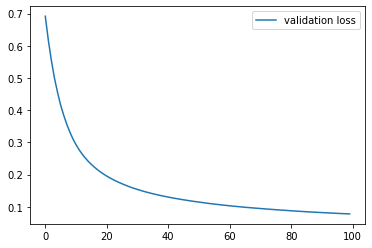

In [12]:
# plot validation loss at each epoch
plt.plot(res.history['val_loss'], label='validation loss')
plt.legend()

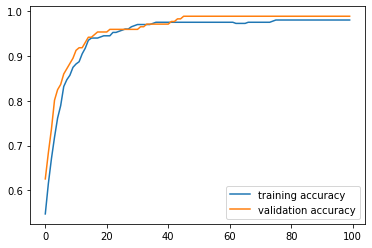

In [13]:
# plot accuracy at each epoch
plt.plot(res.history['accuracy'], label='training accuracy')
plt.plot(res.history['val_accuracy'], label='validation accuracy')
plt.legend()